In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [62]:
start = "2023-01-01"
end = "2024-01-01"
stock = "THYAO.IS"

data = yf.download(stock,start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [63]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,142.399994,147.100006,142.100006,146.800003,146.800003,60745183
2023-01-03,148.300003,150.399994,146.399994,147.399994,147.399994,73564352
2023-01-04,147.899994,148.199997,143.600006,144.500000,144.500000,50055440
2023-01-05,144.800003,147.199997,140.300003,141.800003,141.800003,66261587
2023-01-06,135.199997,144.199997,132.399994,142.500000,142.500000,84430370
...,...,...,...,...,...,...
2023-12-25,232.399994,232.399994,223.899994,226.199997,226.199997,16966698
2023-12-26,227.399994,232.699997,226.100006,227.699997,227.699997,24860552
2023-12-27,227.600006,229.500000,221.600006,222.199997,222.199997,25992461


In [64]:
df = data.copy()
df.isnull().values.any()
df = df.dropna()

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,142.399994,147.100006,142.100006,146.800003,146.800003,60745183
2023-01-03,148.300003,150.399994,146.399994,147.399994,147.399994,73564352
2023-01-04,147.899994,148.199997,143.600006,144.500000,144.500000,50055440
2023-01-05,144.800003,147.199997,140.300003,141.800003,141.800003,66261587
2023-01-06,135.199997,144.199997,132.399994,142.500000,142.500000,84430370


In [65]:
# 1- Day lag plot

import plotly.graph_objects as go

# Making a copy of data 

data = df.copy()

data["Lagged Close"] = data["Close"].shift(1)

fig = go.Figure(data=go.Scatter(x=data["Close"], y=data["Lagged Close"], mode="markers"))

fig.update_layout(
title ="Lag plot of #THYAO.IS Closing Prices with a 1 day lag", 
xaxis_title="Todays Close",
yaxis_title="Previous Days Close",
template="plotly_dark"
)                
                
fig.show()

In [66]:
#Train and Testing Data

train_data=df.iloc[0:int(len(data)*0.8), :]
test_data=df.iloc[int(len(data)*0.8):, :]

In [67]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data["Close"], mode="lines", name="Training Data", line=dict(color="blue")))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data["Close"], mode="lines", name="Testing Data", line=dict(color="green")))

fig.update_layout(
title=f"{stock} Close Prices, Training and Testing Data",
xaxis_title="Dates",
yaxis_title="Close Prices",
template="plotly_dark"
)

fig.show()

Text(0.5, 1.0, 'Rolling Mean and Standart Deviation')

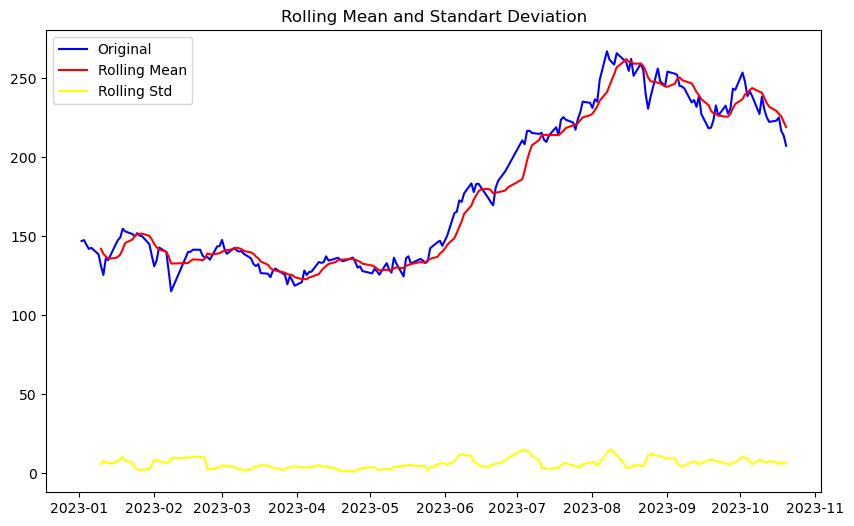

In [68]:
window = 7
train_series = train_data["Close"]

# Determining the rolling statistics

rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

# Plot Rolling Statistics

fig = plt.figure(figsize=(10,6))
orig = plt.plot(train_series, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="yellow", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean and Standart Deviation")

In [69]:
from statsmodels.tsa.stattools import adfuller

window = 7
train_series = train_data["Close"]

dftest = adfuller(train_series, autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value","#Lags used","Number of Observations Used"])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

dfoutput

Test Statistic                  -0.899084
p-value                          0.788274
#Lags used                       0.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64

In [70]:
# Calculate the difference between the consecutive elements and dropping any NaN values

train_diff = train_series.diff(periods=1)
train_diff = train_diff.dropna(inplace = False)

Text(0.5, 1.0, 'Rolling Mean and Standart Deviation')

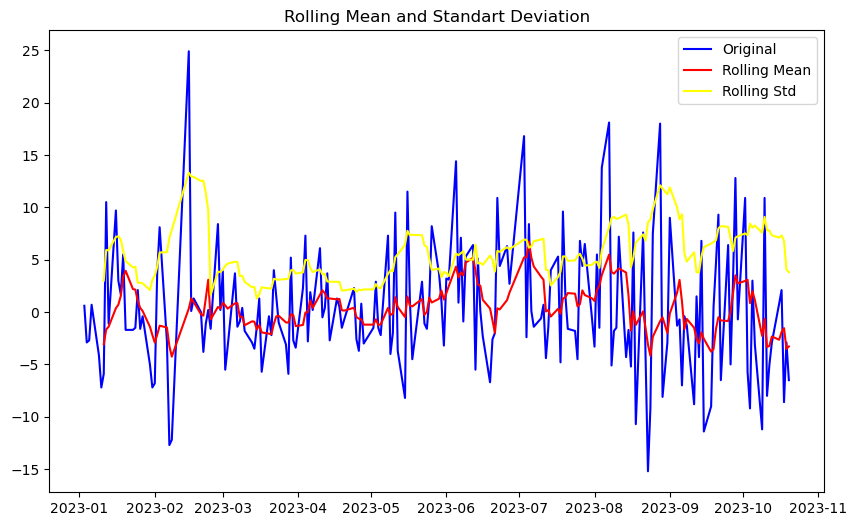

In [71]:
window = 7



rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()



fig = plt.figure(figsize=(10,6))
orig = plt.plot(train_diff, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd,  color="yellow", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean and Standart Deviation")

In [72]:
dftest = adfuller(train_diff, autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value","#Lags used","Number of Observations Used"])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

dfoutput

Test Statistic                -1.466375e+01
p-value                        3.349662e-27
#Lags used                     0.000000e+00
Number of Observations Used    1.970000e+02
Critical Value (1%)           -3.463987e+00
Critical Value (5%)           -2.876326e+00
Critical Value (10%)          -2.574652e+00
dtype: float64

In [73]:
def smape_kun(y_true, y_pred, epsilon=1e-8):
    denominator = (np.abs(y_pred) + np.abs(y_true)) + epsilon
    absolute_percentage_error = np.abs(y_pred - y_true) * 200 / denominator
    mean_smape = np.mean(absolute_percentage_error)
    return mean_smape
     

In [74]:
test_series = test_data["Close"]
test_diff = test_series.diff(periods=1)
test_diff=test_diff.dropna(inplace=False)

In [75]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#initialize the history with our training data

history = [x for x in train_diff]
predictions = list()


for t in range (len(test_diff)):
    p, d, q = 5,1,0
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    obs = test_diff[t]
    history.append(obs)
    
    if t % 100 == 0:
         print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))

      
    
#Calculate MSE

mse = mean_squared_error(test_diff, predictions)
print("Mean Squared Error (MSE): ",mse)


Test Series Point: 0	Predicted=-2.1533790538347155, Expected=4.3000030517578125
Mean Squared Error (MSE):  41.47814773178848


In [76]:
#calculate cumulative sum

reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((50,), (50,))

In [77]:
#calculate error

error = mean_squared_error(reverse_test_diff, reverse_predictions)
error_smape = smape_kun(reverse_test_diff, reverse_predictions)

print("Testing MSE: %.3f" % error)
print("Testing SMAPE %.3f" % error_smape) 

Testing MSE: 352.297
Testing SMAPE 6.971


In [78]:
#take the reserve test_diff and reverse_predictions, convert them to a pandas series, set their indices to a existing time series

reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_test_diff)
reverse_predictions_series.index = test_series.index

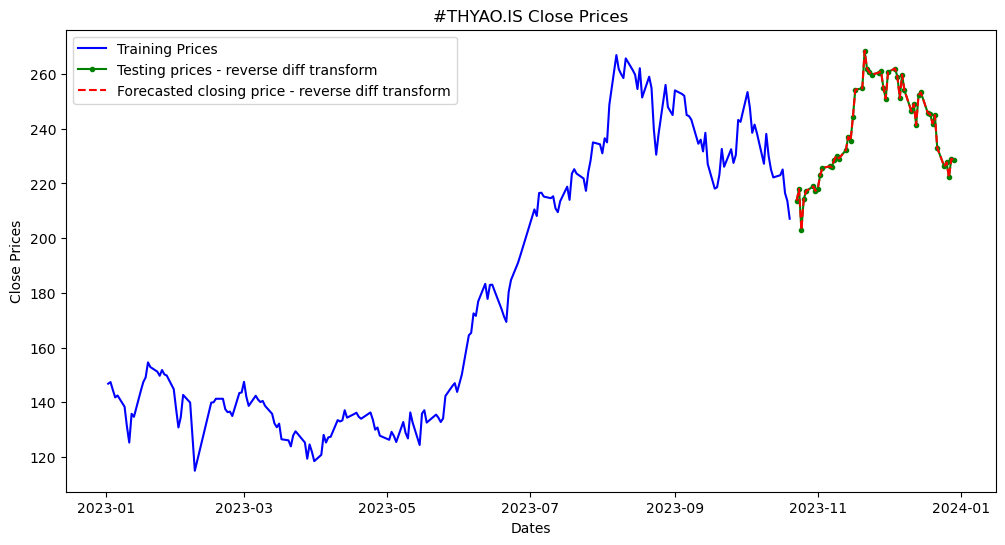

In [79]:
#plotting the results

plt.figure(figsize=(12,6))
plt.title("#THYAO.IS Close Prices")
plt.xlabel("Dates")
plt.ylabel("Close Prices")
plt.plot(train_series, color="blue", label="Training Prices")
plt.plot(reverse_test_diff_series, color="green", marker=".", label="Testing prices - reverse diff transform")
plt.plot(reverse_test_diff_series, color="red", linestyle="--", label="Forecasted closing price - reverse diff transform")
plt.legend()

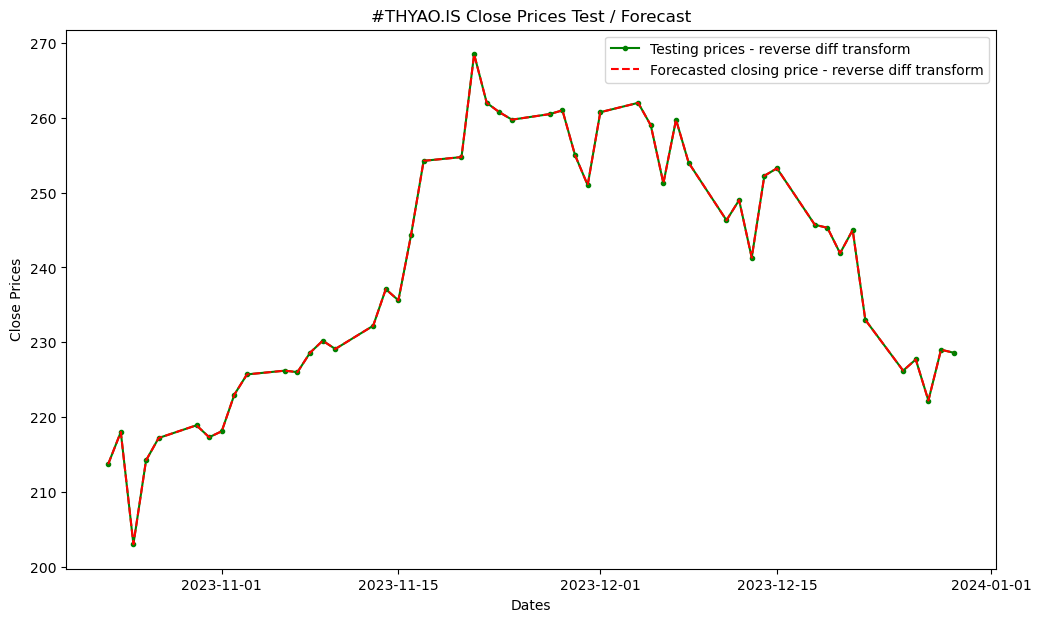

In [80]:
plt.figure(figsize=(12,7))
plt.title("#THYAO.IS Close Prices Test / Forecast")
plt.xlabel("Dates")
plt.ylabel("Close Prices")
plt.plot(reverse_test_diff_series, color="green", marker=".", label="Testing prices - reverse diff transform")
plt.plot(reverse_test_diff_series, color="red", linestyle="--", label="Forecasted closing price - reverse diff transform")
plt.legend()